In [1]:
from sklearn.datasets import make_classification
import numpy as np


# Code snippet to generate the synthetic dataset from scikit-learn for binary classsification

# n_samples: Number of samples to generate
# n_features : Number of features for each sample
# n_informative : Number of informative features. Informative featurs are used to create the separation between the classes
# n_redundant: Number of redundant features. Redundant featurs are linear combinations of the informative featurs and don't add any information
# n_classes: Number of classes
# n_clusters_per_class : Number of clusters per class
# random_state : Random seed for reproducibility
# hypercube : If True, clusters will be generated in a hypercube, which is not the case here.
# class_sep : Separation between classes. Larger values increase the distance 
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)


In [2]:
import matplotlib.pyplot as plt


In [3]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

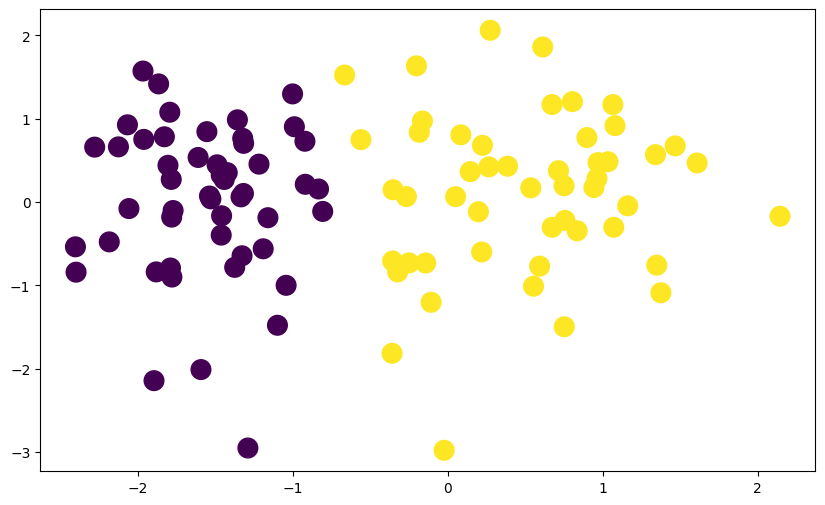

In [5]:
plt.figure(figsize=(10,6))
# maker: Shape of the points
# s : To define the size of the markers
# c: For the color mapping
plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis",marker='o',s=200)

In [6]:
def step(z):
    return 1 if z>0 else 0


def perceptron(X,y):
    
    # adding a bias term into the X
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])  # One dimenstional array of size 3 in this case
    lr = 0.1 #learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights)) # predicting the y by taking the current weight
        weights = weights+lr*(y[j]-y_hat)*X[j]
        
        
    return weights[0],weights[1:]  # first value will he the w0, # second and third value will be w1 and w2

        
            
    

In [7]:
X.shape


(100, 2)

In [8]:
y[41]

0

In [9]:
intercept_,coef = perceptron(X,y)

In [10]:
intercept_

0.9

In [11]:
coef

array([1.35052732, 0.14358558])

In [12]:
# lets find the slopes and intercept to plot on the graph
m = -(coef[0]/coef[1])
b = -(intercept_/coef[1])

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b

(-3.0, 2.0)

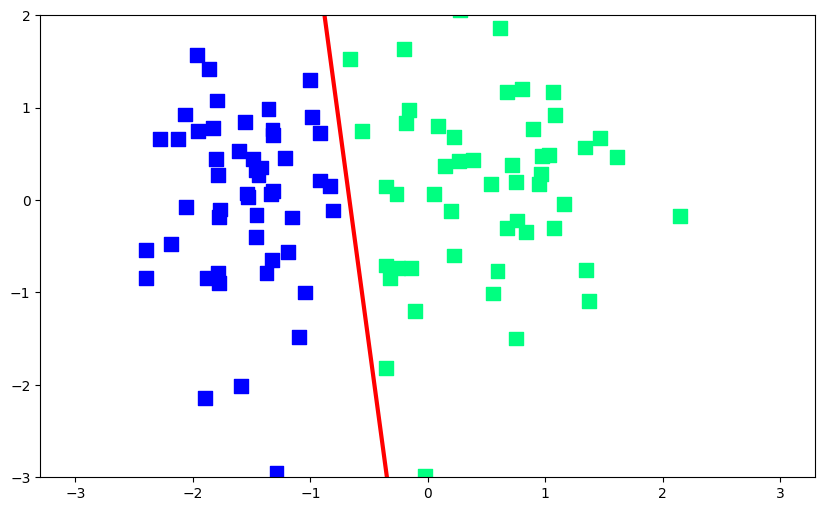

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c =y,cmap="winter",marker="s",s=100)
plt.ylim(-3,2)
            

In [15]:
# Lets draw the animation for the above training to visualize better
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights+lr*(y[j]-y_hat)*X[j]
        
        m.append((-weights[1]/weights[2]))
        b.append((-weights[0]/weights[2]))
        
    return m,b

In [16]:
m,b = perceptron(X,y)

In [17]:
m

[-1.0,
 -1.0,
 -1.0,
 -1.3823957779046752,
 -1.3823957779046752,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.4616923884015105,
 -1.8679010977282182,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -2.314975992056461,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894,
 -3.2382159792799894

In [18]:
b

[-1.0,
 -1.0,
 -1.0,
 -1.0486771749558643,
 -1.0486771749558643,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.2699807873840916,
 -1.3066972221227147,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -1.3368269252975782,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745431576277,
 -2.1594745

In [19]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


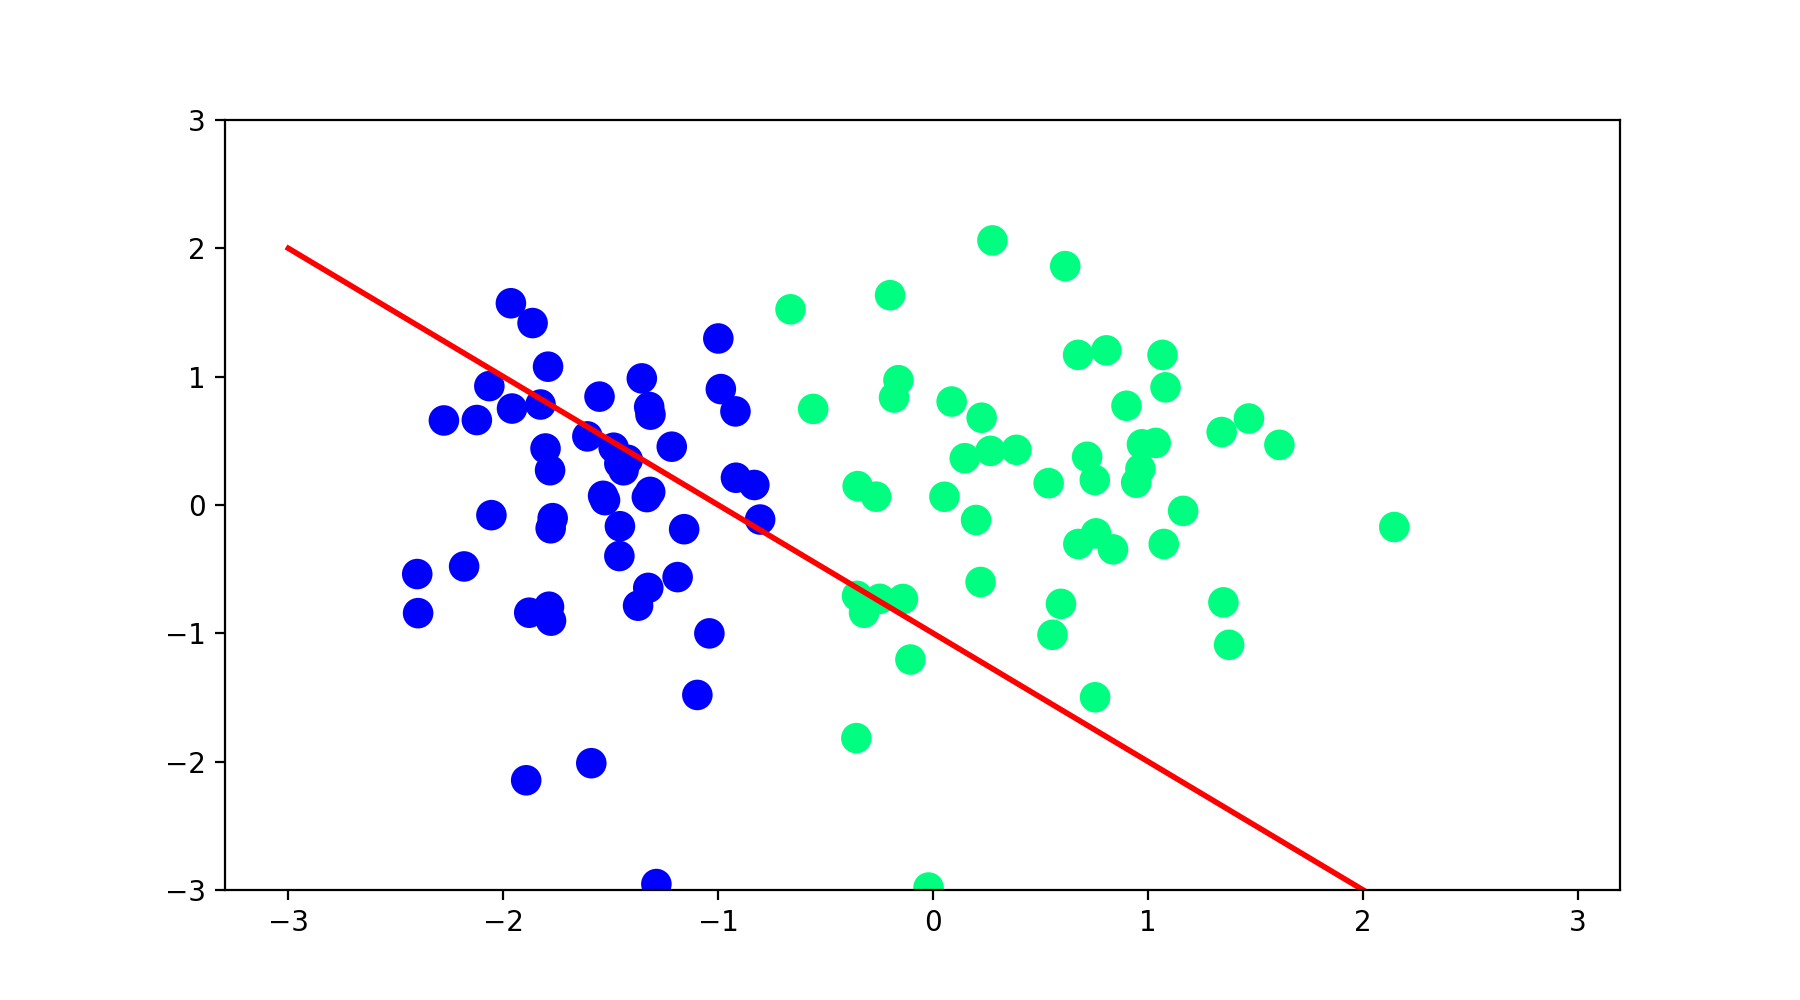

NameError: name 'fig' is not defined

In [20]:
fx, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0]+b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap="winter",s = 100)
line, = ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = "epoch {0}".format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)

    
anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)

In [25]:

anim

NameError: name 'anim' is not defined

## Optimization of the loss function using the gradient decent algorithm

In [26]:
from sklearn.datasets import make_classification
import numpy as np


# Code snippet to generate the synthetic dataset from scikit-learn for binary classsification

# n_samples: Number of samples to generate
# n_features : Number of features for each sample
# n_informative : Number of informative features. Informative featurs are used to create the separation between the classes
# n_redundant: Number of redundant features. Redundant featurs are linear combinations of the informative featurs and don't add any information
# n_classes: Number of classes
# n_clusters_per_class : Number of clusters per class
# random_state : Random seed for reproducibility
# hypercube : If True, clusters will be generated in a hypercube, which is not the case here.
# class_sep : Separation between classes. Larger values increase the distance 
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=15)


In [27]:
X

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,

<IPython.core.display.Javascript object>


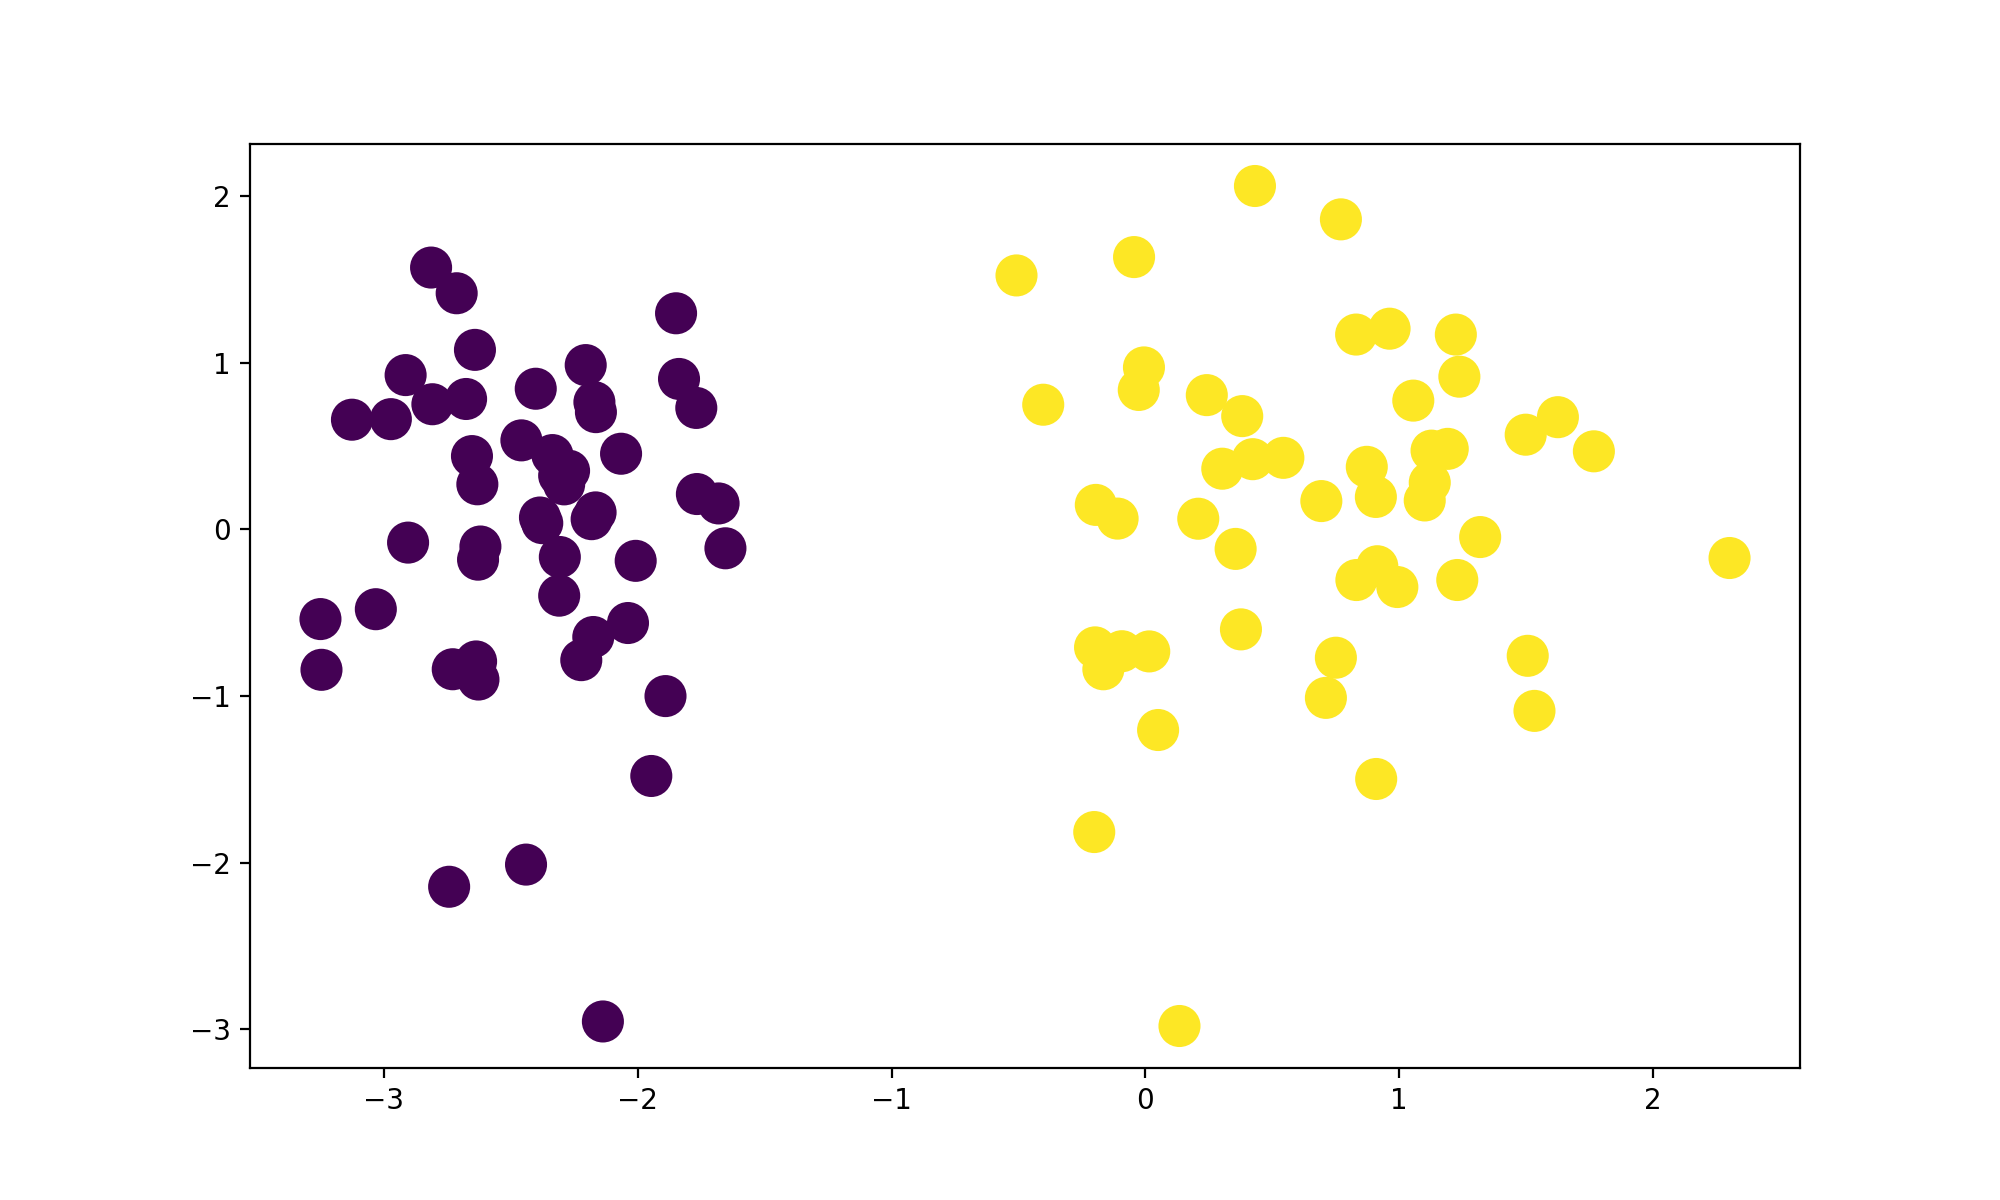

In [28]:
plt.figure(figsize=(10,6))
# maker: Shape of the points
# s : To define the size of the markers
# c: For the color mapping
plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis",marker='o',s=200)

In [24]:
X

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,